## Trực quan hóa dữ liệu

## Mục lục
- [I. Tiền xử lí để trực quan](#i)
- [II. Đặt câu hỏi có ý nghĩa và trả lời bằng trực quan](#ii)
    - [1. Câu hỏi 1](#ii1)
    - [2. Câu hỏi 2](#ii2)
    - [3. Câu hỏi 3](#ii3)
    - [4. Câu hỏi 4](#ii4)
    - [5. Câu hỏi 5](#ii5)
    - [6. Câu hỏi 6](#ii6)
    - [7. Câu hỏi 7](#ii7)
    - [8. Câu hỏi 8](#ii8)
    - [9. Câu hỏi 9](#ii9)
    - [10. Câu hỏi 10](#ii10)
- [Tài liệu tham khảo](#tl)

## I. Tiền xử lí để trực quan <a id="i"></a>

In [2]:
# Các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import csv

from sklearn.linear_model import LinearRegression

In [3]:
# Đọc file csv
df = pd.read_csv('../dataset/Defined_salary.csv')
df.head()

,Location,Experience,Job Level,Industry,Employment Type,Welfare,Job Requirements,Follower,Salary
0,Hai Duong,0.0,Employee,"['accounting', 'auditing', 'statistics']",Official,"['laptop', 'insurance', 'travel', 'allowance',...","{'ms', 'major', 'characteristics', 'excel', 'l...",376,9000000
1,Long An,1.0,Employee,"['maintenance', 'repair']",Official,"['laptop', 'insurance', 'travel', 'allowance',...","{'given', 'college', 'priority', 'refrigeratio...",258,13500000
2,Ha Noi,1.5,Employee,"['marketing', 'sales', 'importexport']",Official,"['insurance', 'travel', 'allowance', 'bonus', ...","{'ability', 'measurement', 'years', 'manage', ...",48,18800000
3,Ho Chi Minh,5.0,Manager,"['interior', 'exterior']",Official,"['insurance', 'travel', 'bonus', 'health', 'ca...","{'check', 'flexible', 'levelhaving', 'understa...",19510,31200000
4,Ho Chi Minh,1.5,Employee,"['interior', 'exterior', 'architecture', 'cons...",Official,"['insurance', 'travel', 'allowance', 'overseas...","{'assigned', 'board', 'prices', 'understanding...",457,13000000


In [4]:
# Danh sách 63 tỉnh/thành phố của Việt Nam
valid_locations = [
    "An Giang", "Bà Rịa - Vũng Tàu", "Bạc Liêu", "Bắc Kạn", "Bắc Giang", "Bắc Ninh",
    "Bến Tre", "Bình Dương", "Bình Định", "Bình Phước", "Bình Thuận", "Cà Mau",
    "Cần Thơ", "Cao Bằng", "Đà Nẵng", "Đắk Lắk", "Đắk Nông", "Điện Biên",
    "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Nội", "Hà Tĩnh",
    "Hải Dương", "Hải Phòng", "Hòa Bình", "Hậu Giang", "Hoà Bình", "Hồ Chí Minh",
    "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lạng Sơn",
    "Lào Cai", "Long An", "Nam Định", "Nghệ An", "Ninh Bình", "Ninh Thuận",
    "Phú Thọ", "Phú Yên", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh",
    "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh", "Thái Bình", "Thái Nguyên",
    "Thanh Hóa", "Thừa Thiên - Huế", "Tiền Giang", "Trà Vinh", "Tuyên Quang",
    "Vĩnh Long", "Vĩnh Phúc", "Yên Bái"
]

In [5]:
# In ra cột 'Location' của dataframe không lặp lại
print(df['Location'].unique())

['Hai Duong' 'Long An' 'Ha Noi' 'Ho Chi Minh' 'Binh Duong' 'Đong Nai'
 'Quang Ngai' 'Vinh Long' 'Lam Đong' 'Can Tho' 'Bac Ninh' 'Dak Lak'
 'Gia Lai' 'Bac Giang' 'Binh Thuan' 'Tay Ninh' 'Ba Ria - Vung Tau'
 'Ha Nam' 'Thai Binh' 'Bac Lieu' 'Thanh Hoa' 'Binh Đinh' 'Tra Vinh'
 'Hoa Binh' 'Đa Nang' 'Hung Yen' 'Hai Phong' 'Kien Giang' 'Vinh Phuc'
 'Ha Giang' 'Tuyen Quang' 'Đien Bien' 'Nam Đinh' 'Lang Son'
 'Kv Đong Nam Bo' 'Nghe An' 'Quang Tri' 'Quang Ninh' 'Ninh Thuan'
 'Đong Thap' 'Quang Nam' 'Thua Thien- Hue' 'Tien Giang' 'Khanh Hoa'
 'Toan Quoc' 'Phu Yen' 'Quang Binh' 'Hau Giang' 'Binh Phuoc' 'Phu Tho'
 'Svay Rieng' 'Ninh Binh' 'Thai Nguyen' 'Bac Can' 'Son La' 'Ha Tinh'
 'Yen Bai' 'Ca Mau' 'An Giang' 'Ben Tre' 'Lao Cai' 'Soc Trang' 'Khac'
 'Đong Bang Song Cuu Long' 'Quoc Te' 'Cao Bang' 'Dak Nong' 'Tokyo'
 'Kon Tum' 'Xiangkhouang' 'Champasak' 'Yokohama' 'Hokkaido'
 'Kv Tay Nguyen' 'Malaysia' 'Kv Bac Trung Bo' 'Bangkok' 'Kratie'
 'Kv Nam Trung Bo' 'Lai Chau' 'Phnompenh']


In [6]:
# Tạo từ điển ánh xạ tên địa điểm sang tiếng Việt chuẩn
city_to_vietnamese = {
    "Hai Duong": "Hải Dương",
    "Long An": "Long An",
    "Ha Noi": "Hà Nội",
    "Ho Chi Minh": "Thành phố Hồ Chí Minh",
    "Binh Duong": "Bình Dương",
    "Đong Nai": "Đồng Nai",
    "Quang Ngai": "Quảng Ngãi",
    "Vinh Long": "Vĩnh Long",
    "Lam Đong": "Lâm Đồng",
    "Can Tho": "Cần Thơ",
    "Bac Ninh": "Bắc Ninh",
    "Dak Lak": "Đắk Lắk",
    "Gia Lai": "Gia Lai",
    "Bac Giang": "Bắc Giang",
    "Binh Thuan": "Bình Thuận",
    "Tay Ninh": "Tây Ninh",
    "Ba Ria - Vung Tau": "Bà Rịa - Vũng Tàu",
    "Ha Nam": "Hà Nam",
    "Thai Binh": "Thái Bình",
    "Bac Lieu": "Bạc Liêu",
    "Thanh Hoa": "Thanh Hóa",
    "Binh Đinh": "Bình Định",
    "Tra Vinh": "Trà Vinh",
    "Hoa Binh": "Hòa Bình",
    "Đa Nang": "Đà Nẵng",
    "Hung Yen": "Hưng Yên",
    "Hai Phong": "Hải Phòng",
    "Kien Giang": "Kiên Giang",
    "Vinh Phuc": "Vĩnh Phúc",
    "Ha Giang": "Hà Giang",
    "Tuyen Quang": "Tuyên Quang",
    "Đien Bien": "Điện Biên",
    "Nam Dinh": "Nam Định",
    "Lang Son": "Lạng Sơn",
    "Nghe An": "Nghệ An",
    "Quang Tri": "Quảng Trị",
    "Quang Ninh": "Quảng Ninh",
    "Ninh Thuan": "Ninh Thuận",
    "Đong Thap": "Đồng Tháp",
    "Quang Nam": "Quảng Nam",
    "Thua Thien- Hue": "Thừa Thiên - Huế",
    "Tien Giang": "Tiền Giang",
    "Khanh Hoa": "Khánh Hòa",
    "Phu Yen": "Phú Yên",
    "Quang Binh": "Quảng Bình",
    "Hau Giang": "Hậu Giang",
    "Binh Phuoc": "Bình Phước",
    "Phu Tho": "Phú Thọ",
    "Ninh Binh": "Ninh Bình",
    "Thai Nguyen": "Thái Nguyên",
    "Bac Can": "Bắc Cạn",
    "Son La": "Sơn La",
    "Ha Tinh": "Hà Tĩnh",
    "Yen Bai": "Yên Bái",
    "Ca Mau": "Cà Mau",
    "An Giang": "An Giang",
    "Ben Tre": "Bến Tre",
    "Lao Cai": "Lào Cai",
    "Soc Trang": "Sóc Trăng",
    "Cao Bang": "Cao Bằng",
    "Dak Nong": "Đắk Nông",
    "Kon Tum": "Kon Tum",
    "Lai Chau": "Lai Châu",
    
    # Khu vực khác
    "Kv Đong Nam Bo": "Khu vực Đông Nam Bộ",
    "Kv Tay Nguyen": "Khu vực Tây Nguyên",
    "Kv Nam Trung Bo": "Khu vực Nam Trung Bộ",
    "Kv Bac Trung Bo": "Khu vực Bắc Trung Bộ",
    "Đong Bang Song Cuu Long": "Đồng Bằng Sông Cửu Long",
    "Toan Quoc": "Toàn Quốc",
    "Khac": "Khác",

    # Các địa điểm khác (được gộp chung vào "foreign city/province")
    "Svay Rieng": "foreign city/province",
    "Tokyo": "foreign city/province",
    "Xiangkhouang": "foreign city/province",
    "Champasak": "foreign city/province",
    "Yokohama": "foreign city/province",
    "Hokkaido": "foreign city/province",
    "Malaysia": "foreign city/province",

    "Bangkok": "foreign city/province",
    "Kratie": "foreign city/province",
    "Phnompenh": "foreign city/province"
}
df['City'] = df['Location']
df['Location'] = df['Location'].map(city_to_vietnamese).astype("category")
df['Location'].value_counts()

Location
Hà Nội                   4017
Thành phố Hồ Chí Minh    3697
Bình Dương                492
Đồng Nai                  391
Long An                   247
                         ... 
Khu vực Bắc Trung Bộ        3
Khu vực Tây Nguyên          3
Khác                        2
Khu vực Nam Trung Bộ        1
Lai Châu                    1
Name: count, Length: 70, dtype: int64

### Việt Nam được chia thành 3 miền và 8 vùng:

Source: [Địa lý Việt Nam](https://vi.wikipedia.org/wiki/%C4%90%E1%BB%8Ba_l%C3%BD_Vi%E1%BB%87t_Nam#C%C3%A1c_v%C3%B9ng_mi%E1%BB%81n).

Bắc Bộ:
- Tây Bắc Bộ
- Đông Bắc Bộ
- Đồng bằng sông Hồng

đôi khi 2 vùng Tây Bắc và Đông Bắc được gộp chung thành Trung du và miền núi phía Bắc

Trung Bộ:
- Bắc Trung Bộ
- Duyên hải Nam Trung Bộ
- Tây Nguyên

Nam Bộ:
- Đông Nam Bộ
- Đồng bằng sông 

In [7]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang vùng
location_to_region = {
# miền Bắc Bộ
    # Tây Bắc Bộ
    "Hòa Bình": "Tây Bắc Bộ", 
    "Lào Cai": "Tây Bắc Bộ",
    "Yên Bái": "Tây Bắc Bộ",
    
    # Đông Bắc Bộ
    "Hà Giang": "Đông Bắc Bộ",
    "Cao Bằng": "Đông Bắc Bộ",
    "Bắc Cạn": "Đông Bắc Bộ",
    "Thái Nguyên": "Đông Bắc Bộ",
    "Lạng Sơn": "Đông Bắc Bộ",
    "Bắc Giang": "Đông Bắc Bộ",
    "Phú Thọ": "Đông Bắc Bộ",
    
    # Đồng bằng sông Hồng
    "Hà Nội": "Đồng bằng sông Hồng",
    "Hải Phòng": "Đồng bằng sông Hồng",
    "Nam Định": "Đồng bằng sông Hồng",
    "Hải Dương": "Đồng bằng sông Hồng",
    "Bắc Ninh": "Đồng bằng sông Hồng",
    "Hà Nam": "Đồng bằng sông Hồng",
    "Thái Bình": "Đồng bằng sông Hồng",
    "Ninh Bình": "Đồng bằng sông Hồng",
    "Bắc Ninh": "Đồng bằng sông Hồng",
    "Hưng Yên": "Đồng bằng sông Hồng",
    
# miền Trung Bộ
    # Bắc Trung Bộ
    "Thanh Hóa": "Bắc Trung Bộ",
    "Nghệ An": "Bắc Trung Bộ",
    "Hà Tĩnh": "Bắc Trung Bộ",
    "Quảng Bình": "Bắc Trung Bộ",
    "Quảng Trị": "Bắc Trung Bộ",
    "Thừa Thiên - Huế": "Bắc Trung Bộ",
    "Khu vực Bắc Trung Bộ": "Bắc Trung Bộ",

    # Duyên hải Nam Trung Bộ
    "Đà Nẵng": "Duyên hải Nam Trung Bộ",
    "Quảng Nam": "Duyên hải Nam Trung Bộ",
    "Quảng Ngãi": "Duyên hải Nam Trung Bộ",
    "Bình Định": "Duyên hải Nam Trung Bộ",
    "Phú Yên": "Duyên hải Nam Trung Bộ",
    "Khánh Hòa": "Duyên hải Nam Trung Bộ",
    "Ninh Thuận": "Duyên hải Nam Trung Bộ",
    "Bình Thuận": "Duyên hải Nam Trung Bộ",
    "Khu vực Nam Trung Bộ": "Duyên hải Nam Trung Bộ",
    
    # Tây Nguyên
    "Lâm Đồng": "Tây Nguyên",
    "Gia Lai": "Tây Nguyên",
    "Kon Tum": "Tây Nguyên",
    "Đắk Nông": "Tây Nguyên",
    "Đắk Lắk": "Tây Nguyên",
    "Khu vực Tây Nguyên": "Tây Nguyên",
    
# miền Nam Bộ
    # Đồng bằng sông Cửu Long
    "Long An": "Đồng bằng sông Cửu Long", 
    "Tiền Giang": "Đồng bằng sông Cửu Long",
    "Bến Tre": "Đồng bằng sông Cửu Long",
    "Bạc Liêu": "Đồng bằng sông Cửu Long",
    "Hậu Giang": "Đồng bằng sông Cửu Long",
    "Đồng Tháp": "Đồng bằng sông Cửu Long",
    "Đồng Bằng Sông Cửu Long": "Đồng bằng sông Cửu Long",
    
    # Đông Nam Bộ
    "Thành phố Hồ Chí Minh": "Đông Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Đông Nam Bộ",
    "Bình Dương": "Đông Nam Bộ",
    "Bình Phước": "Đông Nam Bộ",
    "Đồng Nai": "Đông Nam Bộ",
    "Tây Ninh": "Đông Nam Bộ",
    "Khu vực Đông Nam Bộ": "Đông Nam Bộ",
    
    # Khu vực khác trong nước
    "Khác": "Khu vực khác trong nước",
    # Toàn quốc
    "Toàn Quốc": "Toàn Quốc",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Region'] = df['Location'].map(location_to_region).astype("category")
df['Region'].value_counts()

Region
Đông Nam Bộ                4801
Đồng bằng sông Hồng        4590
Đồng bằng sông Cửu Long     360
Duyên hải Nam Trung Bộ      282
Bắc Trung Bộ                186
Tây Nguyên                  141
Đông Bắc Bộ                 130
Tây Bắc Bộ                   60
Toàn Quốc                    18
Khu vực nước ngoài           11
Khu vực khác trong nước       2
Name: count, dtype: int64

In [8]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang miền
location_to_domain = {
    # miền Bắc Bộ
    "Hòa Bình": "Bắc Bộ", 
    "Lào Cai": "Bắc Bộ",
    "Yên Bái": "Bắc Bộ",
    "Hà Giang": "Bắc Bộ",
    "Cao Bằng": "Bắc Bộ",
    "Bắc Cạn": "Bắc Bộ",
    "Thái Nguyên": "Bắc Bộ",
    "Lạng Sơn": "Bắc Bộ",
    "Bắc Giang": "Bắc Bộ",
    "Phú Thọ": "Bắc Bộ",
    "Hà Nội": "Bắc Bộ",
    "Hải Phòng": "Bắc Bộ",
    "Nam Định": "Bắc Bộ",
    "Hải Dương": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hà Nam": "Bắc Bộ",
    "Thái Bình": "Bắc Bộ",
    "Ninh Bình": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hưng Yên": "Bắc Bộ",
    
    # miền Trung Bộ
    "Thanh Hóa": "Trung Bộ",
    "Nghệ An": "Trung Bộ",
    "Hà Tĩnh": "Trung Bộ",
    "Quảng Bình": "Trung Bộ",
    "Quảng Trị": "Trung Bộ",
    "Thừa Thiên - Huế": "Trung Bộ",
    "Đà Nẵng": "Trung Bộ",
    "Quảng Nam": "Trung Bộ",
    "Quảng Ngãi": "Trung Bộ",
    "Bình Định": "Trung Bộ",
    "Phú Yên": "Trung Bộ",
    "Khánh Hòa": "Trung Bộ",
    "Ninh Thuận": "Trung Bộ",
    "Bình Thuận": "Trung Bộ",
    "Khu vực Nam Trung Bộ": "Trung Bộ",
    "Lâm Đồng": "Trung Bộ",
    "Gia Lai": "Trung Bộ",
    "Kon Tum": "Trung Bộ",
    "Đắk Nông": "Trung Bộ",
    "Đắk Lắk": "Trung Bộ",
    "Khu vực Tây Nguyên": "Trung Bộ",
    
    # miền Nam Bộ
    "Long An": "Nam Bộ", 
    "Tiền Giang": "Nam Bộ",
    "Bến Tre": "Nam Bộ",
    "Bạc Liêu": "Nam Bộ",
    "Hậu Giang": "Nam Bộ",
    "Đồng Tháp": "Nam Bộ",
    "Đồng Bằng Sông Cửu Long": "Nam Bộ",
    "Thành phố Hồ Chí Minh": "Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Nam Bộ",
    "Bình Dương": "Nam Bộ",
    "Bình Phước": "Nam Bộ",
    "Đồng Nai": "Nam Bộ",
    "Tây Ninh": "Nam Bộ",
    "Khu vực Đông Nam Bộ": "Nam Bộ",
    
    # Khu vực khác trong nước
    "Khác": "Khu vực khác trong nước",
    # Toàn quốc
    "Toàn Quốc": "Toàn Quốc",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Domain'] = df['Location'].map(location_to_domain).astype("category")
df['Domain'].value_counts()

Domain
Nam Bộ                     5161
Bắc Bộ                     4780
Trung Bộ                    606
Toàn Quốc                    18
Khu vực nước ngoài           11
Khu vực khác trong nước       2
Name: count, dtype: int64

## II. Đặt câu hỏi có ý nghĩa và trả lời bằng trực quan <a id="ii"></a>

### 1. Câu hỏi 1 <a id="ii1"></a>

### Mức lương trung bình theo các vùng và cấp bậc công việc ở Việt Nam là bao nhiêu?

In [9]:
df['Job Level'].value_counts()

Job Level
Employee            8167
Leader              1052
Manager              931
Intership            636
Chief                120
Deputy Chief          23
General Director       1
Name: count, dtype: int64

In [10]:
# Xóa các giá trị ngoại lai của cột Salary bằng tứ phân vị
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Đếm số lượng giá trị ngoại lai
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print(outliers.shape)

# Lọc bỏ các giá trị ngoại lai
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

(915, 12)


In [11]:
# Lấy lương thấp nhất của các tỉnh
min_salary = df.groupby('Location', observed=True)['Salary'].min().sort_values()
min_salary

Location
Hà Nội                      1000000
Thành phố Hồ Chí Minh       1000000
Đà Nẵng                     1200000
Vĩnh Long                   1200000
Bình Dương                  2000000
                             ...   
foreign city/province      12500000
Lai Châu                   12500000
Đồng Bằng Sông Cửu Long    12500000
Khu vực Tây Nguyên         14000000
Khu vực Bắc Trung Bộ       14000000
Name: Salary, Length: 70, dtype: int64

In [12]:
# Lấy lương cao nhất của các tỉnh
max_salary = df.groupby('Location', observed=True)['Salary'].max()
max_salary = max_salary.sort_values(ascending=False)
max_salary

Location
Thành phố Hồ Chí Minh    30500000
Hà Nội                   30500000
Quảng Ninh               30000000
Bắc Ninh                 30000000
Hà Tĩnh                  30000000
                           ...   
Phú Yên                  15500000
Khu vực Bắc Trung Bộ     14000000
Lai Châu                 12500000
Bắc Cạn                  12500000
Khu vực Nam Trung Bộ     11000000
Name: Salary, Length: 70, dtype: int64

In [13]:
# Tính toán mức lương trung bình theo Location và Job Level
avg_salary = df.groupby(['Location'], observed=True)['Salary'].mean().reset_index()
avg_salary.rename(columns={'Salary': 'Average Salary'}, inplace=True)
print("\nMức lương trung bình theo vùng và cấp bậc công việc:")
print(avg_salary)


Mức lương trung bình theo vùng và cấp bậc công việc:
                   Location  Average Salary
0                  An Giang    1.360714e+07
1         Bà Rịa - Vũng Tàu    1.321600e+07
2                Bình Dương    1.417241e+07
3                Bình Phước    1.372727e+07
4                Bình Thuận    1.198800e+07
..                      ...             ...
65                  Đắk Lắk    1.227381e+07
66                 Đắk Nông    1.467857e+07
67  Đồng Bằng Sông Cửu Long    1.762500e+07
68                 Đồng Nai    1.410724e+07
69                Đồng Tháp    1.336000e+07

[70 rows x 2 columns]


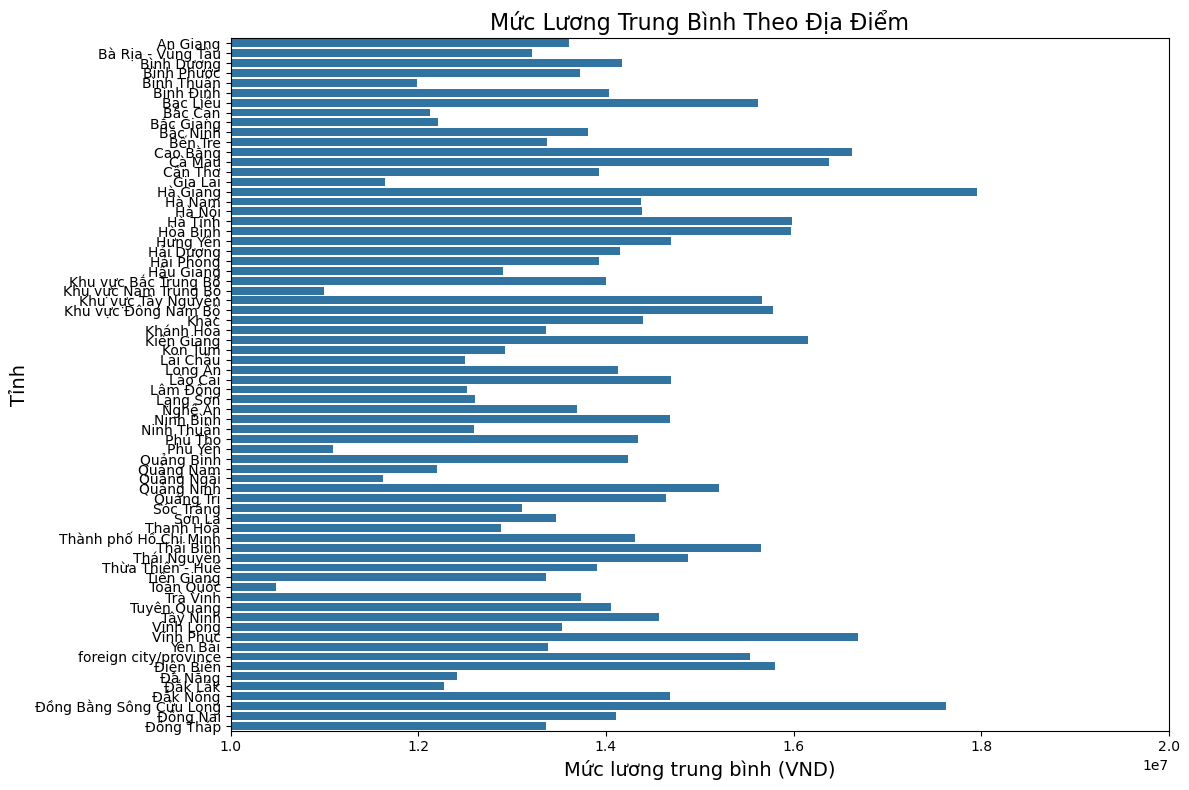

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_salary,
    y='Location',
    x='Average Salary',
)
plt.title('Mức Lương Trung Bình Theo Địa Điểm', fontsize=16)
plt.ylabel('Tỉnh', fontsize=14)
plt.xlabel('Mức lương trung bình (VND)', fontsize=14)
plt.xlim(10000000, 20000000)
plt.tight_layout()
plt.show()

### 2. Câu hỏi 2 <a id="ii2"></a>

### 3. Câu hỏi 3 <a id="ii3"></a>

### 4. Câu hỏi 4 <a id="ii4"></a>

### 5. Câu hỏi 5 <a id="ii5"></a>

### 6. Câu hỏi 6 <a id="ii6"></a>

### 7. Câu hỏi 7 <a id="ii7"></a>

### 8. Câu hỏi 8 <a id="ii8"></a>

### 9. Câu hỏi 9 <a id="ii9"></a>

### 10. Câu hỏi 10 <a id="ii10"></a>

## Tài liệu tham khảo  <a id="tl"></a>